In [1]:
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout, ZeroPadding2D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [9]:
data_generator = ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    fill_mode='nearest'
)

train = data_generator.flow_from_directory('train_images/', target_size=(300,300), class_mode='categorical', batch_size=10)
test = data_generator.flow_from_directory('test_images/', target_size=(300,300), class_mode='categorical', batch_size=10)

Found 78 images belonging to 11 classes.
Found 78 images belonging to 11 classes.


In [10]:
model = Sequential([
    Input(shape=(300,300,3)),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.4),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(11,activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_8 (ZeroPadding2D)     │ (None, 302, 302, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 300, 300, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 150, 150, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 150, 150, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_9 (ZeroPadding2D)     │ (None, 152, 152, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 150, 150, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_10 (ZeroPadding2D)    │ (None, 77, 77, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_11 (ZeroPadding2D)    │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 37, 37, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 18, 18, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         663,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 791,707 (3.02 MB)

 Trainable params: 791,707 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, steps_per_epoch=len(train), validation_data=test, validation_steps=len(test), epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.0893 - loss: 2.6938 - val_accuracy: 0.0897 - val_loss: 2.3976
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.1407 - loss: 2.4186 - val_accuracy: 0.1026 - val_loss: 2.3978
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.1175 - loss: 2.3973 - val_accuracy: 0.0897 - val_loss: 2.3979
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1021 - loss: 2.4023 - val_accuracy: 0.0897 - val_loss: 2.3979
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.0404 - loss: 2.4024 - val_accuracy: 0.0897 - val_loss: 2.3978
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1904 - loss: 2.3960 - val_accuracy: 0.0897 - val_loss: 2.3978
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.0476 - loss: 2.3981 - val_accuracy: 0.1026 - val_loss: 2.3977
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.0404 - loss: 2.3996 - val_accuracy: 0.1026 - val_loss: 2.3977


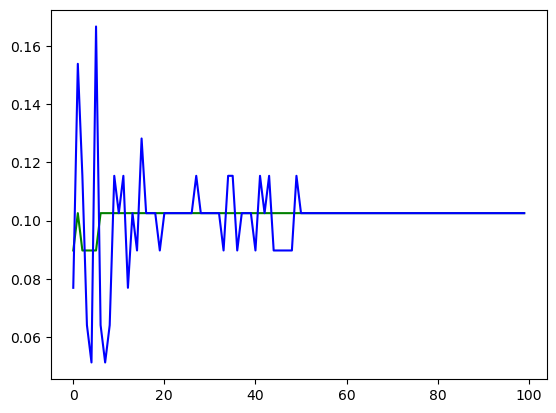

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], color='green')
plt.plot(history.history['accuracy'], color='blue')

In [19]:
from sklearn.metrics import classification_report
name_list = ['amir', 'amir_hoseini','ashkan','davari','khara','mohammad',
             'mosadegh','mostafa','nahang','rahim','taherkhoo']

y_pred = model.predict(test)
y_pred_correct = []
name = ''

for i in range(len(y_pred)):
    value = np.argmax(y_pred[i])
    name = name_list[value]
    y_pred_correct.append(value)
    
    image = test[i]
    print(image[0])
    cv2.imshow(name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step
[[[[0.15642676 0.05882353 0.07050104]
   [0.15686275 0.05729532 0.06600361]
   [0.15686275 0.05567992 0.06115738]
   ...
   [0.78745615 0.40314236 0.28941688]
   [0.7700555  0.38574174 0.27201623]
   [0.7568628  0.37254903 0.25882354]]

  [[0.14176717 0.05882353 0.06756912]
   [0.14984421 0.05882353 0.06918453]
   [0.15686275 0.05861183 0.06995314]
   ...
   [0.77589273 0.39157897 0.27785346]
   [0.7616308  0.377317   0.26359153]
   [0.7568628  0.37254903 0.25882354]]

  [[0.12507811 0.05882353 0.06260774]
   [0.13477057 0.05882353 0.06583855]
   [0.14326167 0.05882353 0.06786802]
   ...
   [0.76746804 0.3831543  0.2694288 ]
   [0.7568628  0.37254903 0.25882354]
   [0.7568628  0.37254903 0.25882354]]

  ...

  [[0.10908674 0.07379261 0.07914857]
   [0.10623434 0.07094023 0.08200096]
   [0.10338195 0.07558905 0.08485335]
   ...
   [0.4010664  0.08734089 0.09126247]
   [0.4026818  0.0889563  0.09287786]
   [0.40429723 0.09057171 0.09449328]]

  [[0.

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numerical tuple
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


In [13]:
print(classification_report(y_true=y_test, y_pred=y_pred_correct))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.09      1.00      0.17         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8

    accuracy                           0.09        88
   macro avg       0.01      0.09      0.02        88
weighted avg       0.01      0.09      0.02        88



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#(0:amir) (1:amir_hoseini) (2:ashkan) (3:davari) (4:khara) 
#(5:mohammad) (6:mosadegh) (7:nahang) (8:taherkhoo) (9:rahim) (10:mostafa)